In [1]:
import numpy as np


In [2]:
np.__version__

'1.16.2'

# 计算运行时间的两种方法

1. `%time`:计算单次运行时间
2. `%timeit`:计算平均运行时间

In [3]:
arr = np.random.randint(1, 1000, (100, 100000))

In [4]:
%time arr * 100

Wall time: 103 ms


array([[17600, 93500, 55900, ..., 91100, 42900, 57400],
       [ 5800, 60000, 78700, ..., 45500, 66600, 35300],
       [94600, 86600, 26000, ..., 74300, 18000,  8800],
       ...,
       [19400, 32300, 84100, ..., 92000, 38700, 53400],
       [51300, 42400, 50300, ..., 33000, 45700, 94200],
       [10800, 67800, 16200, ..., 72300, 53900, 83100]])

In [5]:
%timeit arr*100

41.5 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


1. `%%time`计算模块运行时间
2. `%%timeit` 计算模块平均运行时间

In [6]:
%%time
arr2 = arr * 10
arr2 + arr

Wall time: 73.5 ms


In [7]:
%%timeit 
arr2 = arr * 10
arr2 + arr

79.9 ms ± 957 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 显示魔法函数列表

In [8]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

# 创建等差数列

In [9]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [10]:
np.linspace(0, 10, 11, endpoint=False) # 不算结尾

array([0.        , 0.90909091, 1.81818182, 2.72727273, 3.63636364,
       4.54545455, 5.45454545, 6.36363636, 7.27272727, 8.18181818,
       9.09090909])

# 保留小数

In [11]:
arr = np.random.random(1)
print(arr)
print(arr.round(2))

[0.13818083]
[0.14]


# 将图片数组化

In [12]:
from PIL import Image

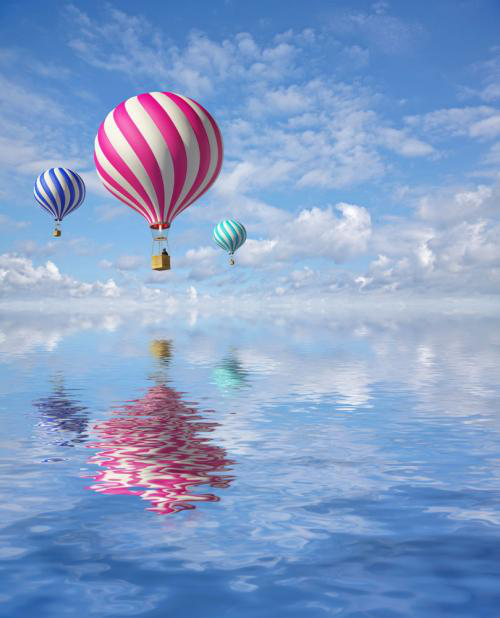

In [13]:
img = Image.open('images/1_2.jfif')
img

>图片一般是三维的数组，每个维度分别是  
(高度， 宽度， 像素)  或者 （行， 列， 其他）

In [14]:
img_arr = np.array(img)
img_arr.shape

(618, 500, 3)

> int8 = `2^8 = 256` int8是带符号的，所以它的显示范围是[-128, 127]   
uint8: 无符号整数[0, 256]

In [15]:
np.int8(129)

-127

利用数组变换， 改变图像

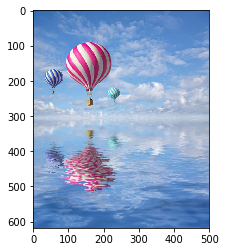

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.imshow(img)

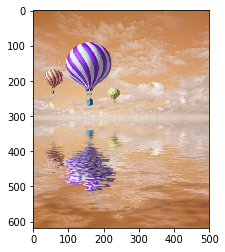

In [17]:
# 修改对像素的控制数组，实现图片颜色变换
img2 = Image.fromarray(img_arr[:,:,::-1])
plt.imshow(img2)

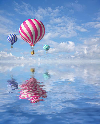

In [18]:
# 实现图片缩小
img3 = Image.fromarray(img_arr[::5, ::5])
img3

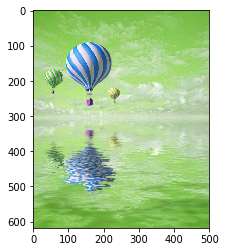

In [19]:
# 图片的像素为(r,g,b), 对像素进行变换
img3 = Image.fromarray(img_arr[:,:,[1,2,0]])
plt.imshow(img3)

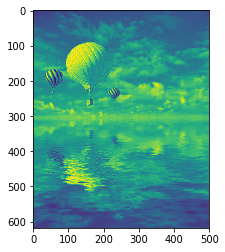

In [20]:
# 只提取图片的长和宽，不提取像素，实现图片灰度
img4 = img_arr[:,:,0]
plt.imshow(img4)

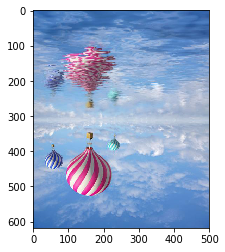

In [21]:
# 实现图片颠倒
plt.imshow(img_arr[::-1])

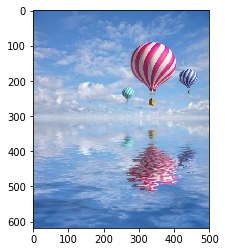

In [22]:
# 左右颠倒
plt.imshow(img_arr[:, ::-1])

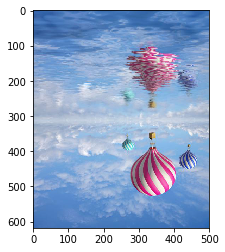

In [23]:
# 上下左右颠倒
plt.imshow(img_arr[::-1, ::-1])

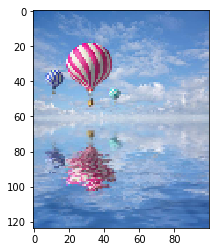

In [24]:
# 实现马赛克
plt.imshow(img_arr[::5, ::5])

# 数组转置，实现图片宽度和高度对调

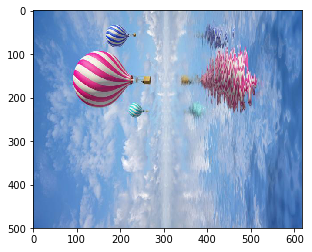

In [25]:
img6 = np.transpose(img_arr, axes=(1,0,2))  # 转置，axes=（）指定轴转换
plt.imshow(img6)

# `np.concatenate()`实现图片拼接

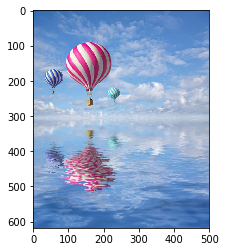

In [26]:
plt.imshow(img_arr)

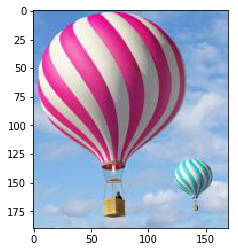

In [27]:
# 截取图片
img7 = img_arr[90:280, 90:260]
plt.imshow(img7)

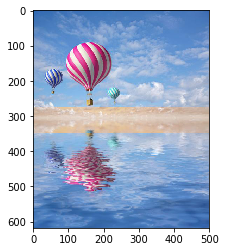

In [28]:
# 截取图片并拼接, 对高度进行截取
img8 = img_arr[:275]
# 截取高度[275,350),并调换颜色
img9 = img_arr[275:350, :, ::-1]
img10 = img_arr[350:]
img11 = np.concatenate([img8, img9, img10])
plt.imshow(img11)

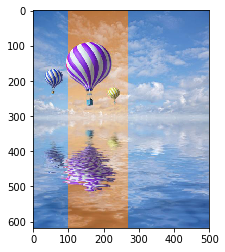

In [29]:
# 截取图片宽度
img12 = img_arr[:,:100]
img13 = img_arr[:, 100:270, ::-1]
img14 = img_arr[:, 270:]
# 指定对1轴(宽度)进行连接
img15 = np.concatenate([img12, img13, img14], axis=1)
plt.imshow(img15)

# 水平级联、垂直级联

1. `np.hstack(tuple)` 水平级联，水平方向数组会增加
2. `np.vstack(tuple)` 垂直级联，垂直方向数组会增加

In [73]:
arr1 = np.array([[1,2,3], [100,200,300]])
arr2 = np.array([[4,5,6], [400,500,600]])
print('arr1:',arr1.shape)
print('arr2:',arr2.shape)

arr1: (2, 3)
arr2: (2, 3)


In [74]:
# 水平级联意味着，对列连接，行保持不变
np.hstack((arr1, arr2))

array([[  1,   2,   3,   4,   5,   6],
       [100, 200, 300, 400, 500, 600]])

In [75]:
# 垂直级联意味着，对行连接，列保持不变
np.vstack((arr1,arr2))

array([[  1,   2,   3],
       [100, 200, 300],
       [  4,   5,   6],
       [400, 500, 600]])

In [76]:
arr1 = np.random.randint(1,10,size=(4,5))
arr2 = np.random.randint(1,10,size=(5,5))

In [78]:
# 报错，维度不一致
# np.hstack((arr1,arr2))

In [86]:
np.vstack((arr1,arr2))
# 上下两个相等
# np.concatenate((arr1,arr2), axis=0)

array([[7, 1, 6, 6, 6],
       [9, 6, 8, 9, 2],
       [7, 2, 8, 6, 5],
       [2, 7, 6, 6, 3],
       [2, 4, 1, 5, 8],
       [8, 6, 8, 5, 3],
       [8, 9, 6, 3, 5],
       [5, 2, 9, 8, 8],
       [4, 9, 5, 1, 9]])

# 切分
+ `np.split(arr,indices_or_sections, axis=0 )`
+ `np.hsplit(arr,indices_or_sections)`
+ `np.vsplit(arr,indices_or_sections)`  
axis指定哪个轴，那个轴不会发生变化

In [111]:
arr = np.arange(1,31).reshape((5,6))

In [113]:
np.split(arr, [1], axis=0)

[array([[1, 2, 3, 4, 5, 6]]), array([[ 7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29, 30]])]

In [114]:
np.split(arr,[1,4], axis=0)

[array([[1, 2, 3, 4, 5, 6]]), array([[ 7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24]]), array([[25, 26, 27, 28, 29, 30]])]


如果输入整数的话，则对数组平均切割，所以输入的整数要能被指定轴的维度整除

In [130]:
# np.split(arr, 2, axis=0)
# 报错， 因为axis=0时，维度为5，不能被2整除
arr.shape

(4, 5)

In [116]:
np.split(arr, 2 ,axis=1)

[array([[ 1,  2,  3],
        [ 7,  8,  9],
        [13, 14, 15],
        [19, 20, 21],
        [25, 26, 27]]), array([[ 4,  5,  6],
        [10, 11, 12],
        [16, 17, 18],
        [22, 23, 24],
        [28, 29, 30]])]

水平切割与垂直切割

In [117]:
arr

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30]])

In [118]:
# 水平切割的实质就是对列切割
np.hsplit(arr, [1,3])

[array([[ 1],
        [ 7],
        [13],
        [19],
        [25]]), array([[ 2,  3],
        [ 8,  9],
        [14, 15],
        [20, 21],
        [26, 27]]), array([[ 4,  5,  6],
        [10, 11, 12],
        [16, 17, 18],
        [22, 23, 24],
        [28, 29, 30]])]

In [119]:
np.vsplit(arr, [1,-1])

[array([[1, 2, 3, 4, 5, 6]]), array([[ 7,  8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17, 18],
        [19, 20, 21, 22, 23, 24]]), array([[25, 26, 27, 28, 29, 30]])]

# 副本
numpy为了节省内存，会直接对array操作，不会返回新的array，

In [121]:
arr2 = arr
print('arr:',id(arr))
print('arr2:',id(arr2))

arr: 2415636587104
arr2: 2415636587104


对数组进行复制

In [123]:
arr2 = arr.copy()
print('arr:',id(arr))
print('arr2:',id(arr2))

arr: 2415636587104
arr2: 2415633336480


# 聚合操作

In [125]:
arr = np.random.randint(1,101, size=(4,5))
arr

array([[58, 27, 83, 48, 21],
       [48, 19, 55, 77, 79],
       [87, 91, 67, 47, 47],
       [54, 71,  5, 60, 14]])

In [127]:
arr.min()

5

In [129]:
# 指定轴
arr.min(axis=0)

array([48, 19,  5, 47, 14])

中位数
+ `np.median()`

In [133]:
# 报错， arr对象没有中位数，
# arr.median()
np.median(arr)

54.5

上面的也可以分成如下几步
+ 将数组降维(1D)
+ 求中位数

In [136]:
arr2 = np.ravel(arr)
np.median(arr2)

54.5

In [140]:
arr

array([[58, 27, 83, 48, 21],
       [48, 19, 55, 77, 79],
       [87, 91, 67, 47, 47],
       [54, 71,  5, 60, 14]])

In [143]:
np.median(arr, axis=1)

array([48., 55., 67., 54.])

查看arr是不为0

In [146]:
arr.any()

True

In [147]:
arr.all()

True

In [150]:
arr[0,0] =0
arr.all()

False

In [152]:
arr.all(axis=0)

array([False,  True,  True,  True,  True])

# 统计学相关

## 协方差
$$cov(X,Y) = E(X-EX) E(Y-EY)$$  
$$cov(X,Y) = \sum_{i=1}^{n} \frac{(X_i-\bar{X})(Y_i -\bar{Y})}{n}$$  
>起源：协方差自然是由方差衍生而来的，方差反应的是一个变量（一维）的离散程度，到二维了，我们可以对每个维度求其离散程度，但我们还想知道更多。我们想知道两个维度（变量）之间的关系，直观的举例就是身高和体重（青少年），我们采集到的数据里面有一种固有的性质，那就是身高越高的样本似乎总有着更大的体重，那我们如何衡量这种关系呢，单独求两个方差是不行的。  
因此协方差应运而生，它的公式也与方差极度同源，方差是每个样本减去均值的平方后去平均（n-1），协方差就把平方的2拆成1+1，就是x减去x的平均，乘以，y减去y的平均，最后对整体取平均。

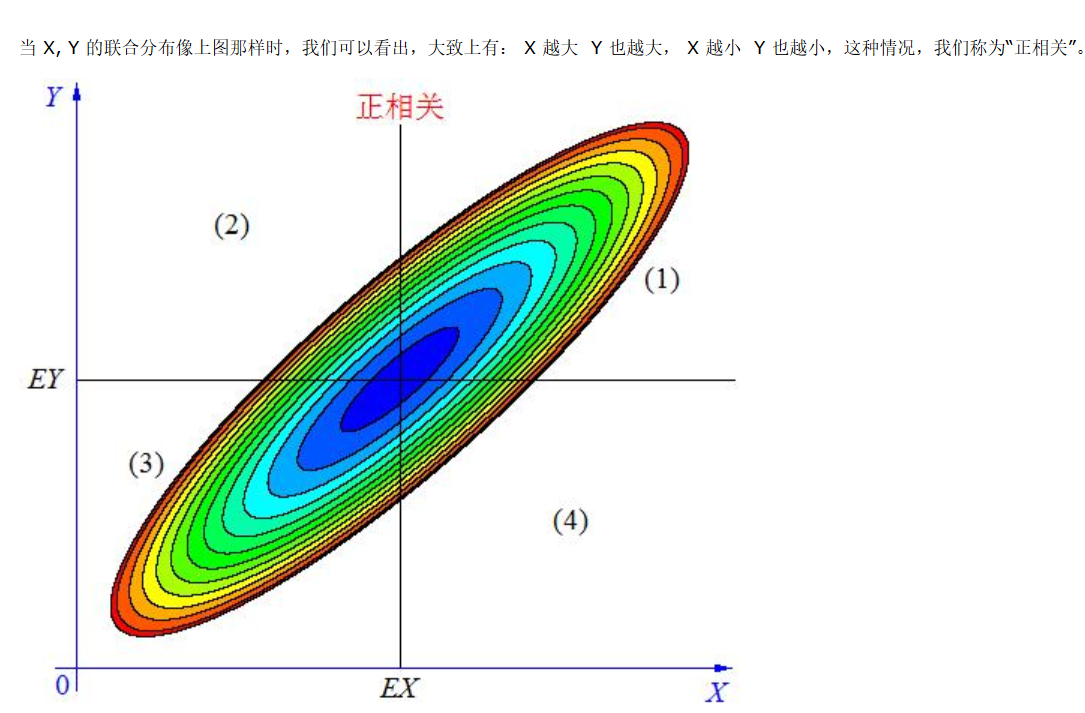

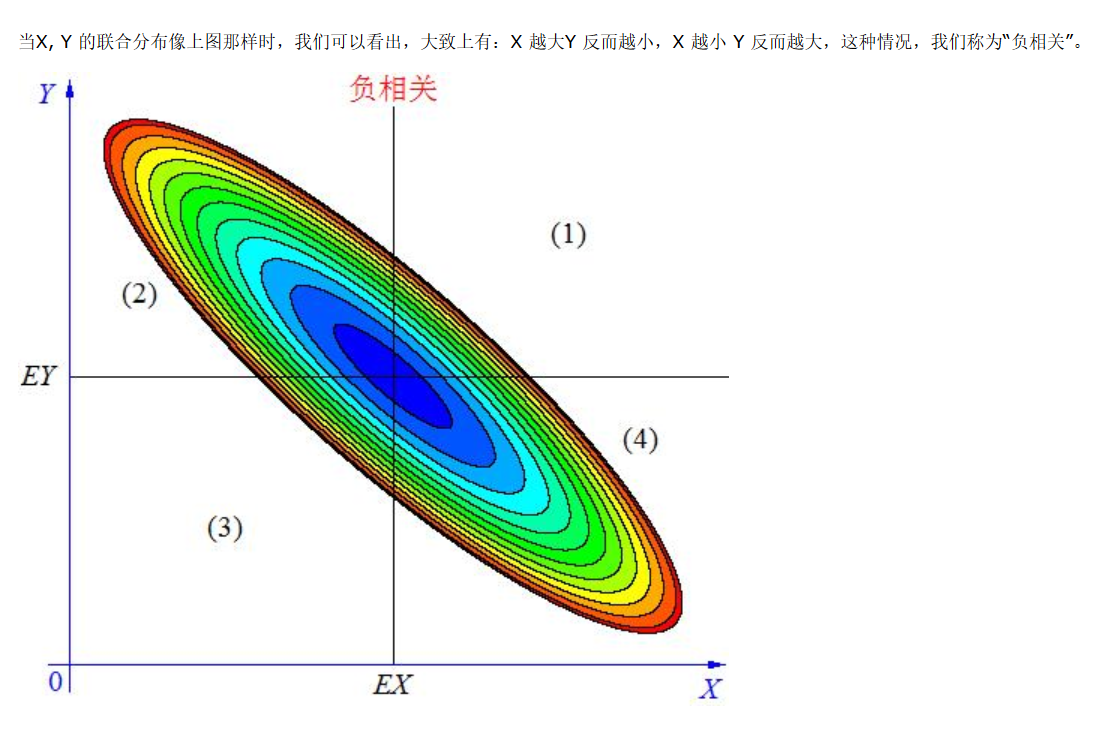

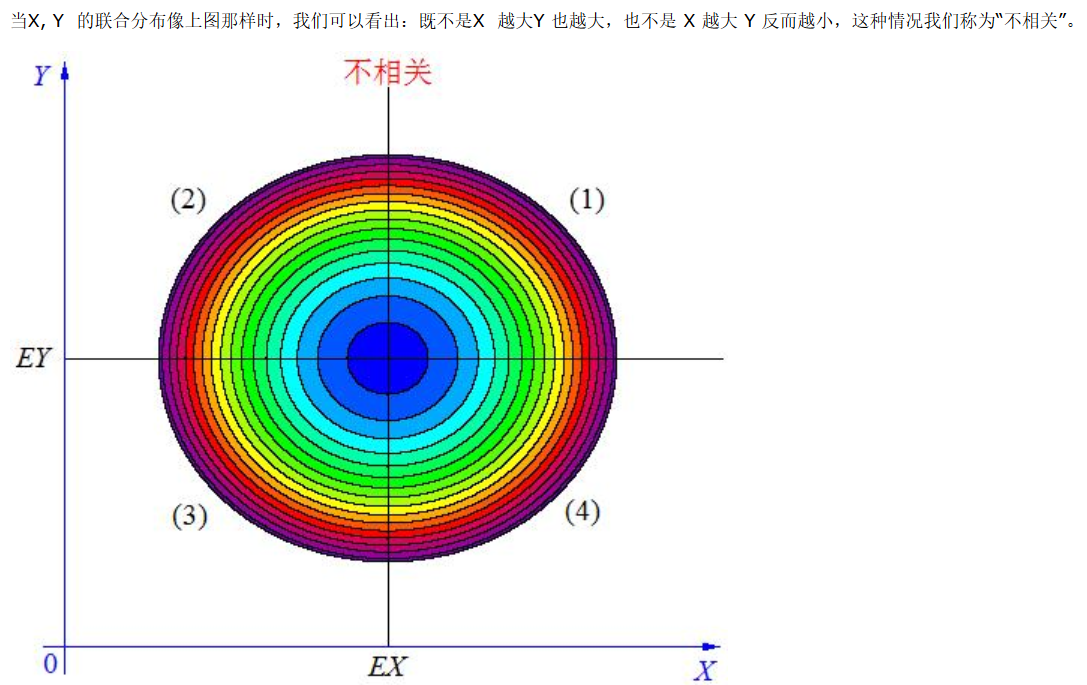

In [160]:
cov_arr1_arr2 = np.cov(arr1,arr2)
cov_arr1_arr2

array([[ 8.7 , -3.85],
       [-3.85,  3.8 ]])

In [162]:
std_arr1 = np.std(arr1)
std_arr2 = np.std(arr2)

In [169]:
a, b = np.random.rand(2, 4)
print(np.cov(a, b))
print(np.cov([a, b]))
print(np.dot(a - np.mean(a), b - np.mean(b)) / (len(a) - 1))

[[0.06769126 0.07733747]
 [0.07733747 0.1673695 ]]
[[0.06769126 0.07733747]
 [0.07733747 0.1673695 ]]
0.07733747253451935


## 相关系数
`np.correlate(a, v, mode='valid')`
$$R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }$$
>$np.cov()$描述的是两个向量协同变化的程度，它的取值可能非常大，也可能非常小，这就导致没法直观地衡量二者协同变化的程度。相关系数实际上是正则化的协方差，n个变量的相关系数形成一个n维方阵。

In [174]:
arr1 = np.random.randint(1,10,(4,5))
arr2 = np.random.randint(1,10,(4,5))

In [183]:
np.corrcoef(arr1, arr2)

array([[ 1.        , -0.05732252, -0.03403645,  0.7021512 ,  0.09206391,
         0.34721923, -0.93662963, -0.07073233],
       [-0.05732252,  1.        , -0.48581271,  0.44214791, -0.14600627,
         0.225913  ,  0.34278978, -0.52882986],
       [-0.03403645, -0.48581271,  1.        , -0.02917052,  0.1418634 ,
        -0.05030273, -0.27138488,  0.74219098],
       [ 0.7021512 ,  0.44214791, -0.02917052,  1.        , -0.42320283,
         0.7935464 , -0.59689935, -0.45032195],
       [ 0.09206391, -0.14600627,  0.1418634 , -0.42320283,  1.        ,
        -0.87821799, -0.07785471,  0.74404746],
       [ 0.34721923,  0.225913  , -0.05030273,  0.7935464 , -0.87821799,
         1.        , -0.33127397, -0.679483  ],
       [-0.93662963,  0.34278978, -0.27138488, -0.59689935, -0.07785471,
        -0.33127397,  1.        , -0.14770757],
       [-0.07073233, -0.52882986,  0.74219098, -0.45032195,  0.74404746,
        -0.679483  , -0.14770757,  1.        ]])

In [198]:
arr1 = np.array([1,2,3,4])
arr2 = np.array([2,3,3,5])
np.cov(arr1, arr2)

array([[1.66666667, 1.5       ],
       [1.5       , 1.58333333]])

In [216]:
np.cov(arr1, ddof=0)

array(1.25)

## 直方图

```python
Signature:
np.histogram(
    a,
    bins=10,  # 将x轴分为几份
    range=None,  # 默认按[min, max]划分bins份
    normed=None,
    weights=None,
    density=None,
)
```

In [229]:
arr = np.random.randint(1, 101, 100)
print('min:',arr.min(), 'max:', arr.max())

min: 2 max: 99


In [231]:
# 默认将[min, max]分为bins份
np.histogram(arr)

(array([ 8,  6, 11, 12, 12, 12, 14,  7, 10,  8], dtype=int64),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]))

In [247]:
# 指定分组
np.histogram(arr, bins=20, range=(0.5, 100.5))

(array([ 3,  3,  5,  2,  4,  8,  8,  4, 10,  2,  4,  8,  5, 11,  2,  3,  4,
         6,  4,  4], dtype=int64),
 array([  0.5,   5.5,  10.5,  15.5,  20.5,  25.5,  30.5,  35.5,  40.5,
         45.5,  50.5,  55.5,  60.5,  65.5,  70.5,  75.5,  80.5,  85.5,
         90.5,  95.5, 100.5]))

(array([ 3.,  3.,  5.,  2.,  4.,  8.,  8.,  4., 10.,  2.,  4.,  8.,  5.,
        11.,  2.,  3.,  4.,  6.,  4.,  4.]),
 array([  0.5,   5.5,  10.5,  15.5,  20.5,  25.5,  30.5,  35.5,  40.5,
         45.5,  50.5,  55.5,  60.5,  65.5,  70.5,  75.5,  80.5,  85.5,
         90.5,  95.5, 100.5]),
 <a list of 20 Patch objects>)

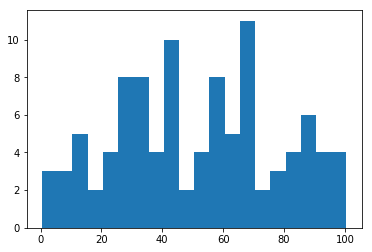

In [254]:
import matplotlib.pyplot as plt
plt.hist(arr, bins=20, range=(0.5, 100.5))

# 保存与读取文件

In [257]:
arr = np.random.randint(1,100,(4,6))

## 保存文件
1. `np.save()`
2. `np.savetxt()`

In [259]:
np.save('data/np_data.npy', arr)

In [261]:
np.savetxt('data/np_data.txt', arr)

## 读取文件
1. `np.load()`
2. `np.loadtxt()`

In [263]:
np.load('data/np_data.npy')

array([[39, 23, 16, 98,  3, 41],
       [28, 89, 20, 76, 20, 73],
       [57, 13,  7, 36, 44, 22],
       [18, 51, 74, 13, 77, 81]])

In [264]:
np.loadtxt('data/np_data.txt')

array([[39., 23., 16., 98.,  3., 41.],
       [28., 89., 20., 76., 20., 73.],
       [57., 13.,  7., 36., 44., 22.],
       [18., 51., 74., 13., 77., 81.]])

# 线性代数

例题：  
x = 1, y = -5, z = 14  
x + y + z = 10  
x + 2y + z = 5    
2x + y - z = -17

Xw = Y  


In [277]:
X = np.array([[1, 1, 1], [1, 2, 1], [2, 1 ,-1]])
Y = np.array([10, 5, -17])
print("X:\n", X)
print('')
print('Y:', Y)

X:
 [[ 1  1  1]
 [ 1  2  1]
 [ 2  1 -1]]

Y: [ 10   5 -17]


$$X^{-1}Xw = X^{-1}Y$$  
$$w = X^{-1}Y$$

## 求矩阵的逆矩阵

In [278]:
X_inv = np.linalg.inv(X)

## 求矩阵的点积

In [279]:
w = np.dot(X_inv, Y)
w

array([ 1., -5., 14.])

## 直接求解

In [280]:
np.linalg.tensorsolve(X, Y)

array([ 1., -5., 14.])